In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
dataset = pd.read_csv('Dataset-SA.csv')
dataset

product_name  product_price  Rate  \
0     Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     5   
1     Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     5   
2     Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     3   
3     Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     1   
4     Candes 12 L Room/Personal Air Cooler??????(Whi...           3999     3   
...                                                 ...            ...   ...   
4745  Mivi Fort S16 Soundbar with 2 full range drive...           1499     5   
4746  Mivi Fort S16 Soundbar with 2 full range drive...           1499     5   
4747  Mivi Fort S16 Soundbar with 2 full range drive...           1499     4   
4748  Mivi Fort S16 Soundbar with 2 full range drive...           1499     4   
4749  Mivi Fort S16 Soundbar with 2 full range drive...           1499     5   

                 Review                                            Summary  \
0                super!  great cooler excellent air flow and for this p...   
1               awesome              best budget 2 fit cooler nice cooling   
2                  fair  the quality is good but the power of air is de...   
3       useless product                  very bad product its a only a fan   
4                  fair                                      ok ok product   
...                 ...                                                ...   
4745          just wow!                            over all a nice product   
4746  worth every penny  excellent sound quality and connectivity is go...   
4747        good choice                                      super awesome   
4748    worth the money                                    value for money   
4749          fabulous!  taking about sound quality is good but not tha...   

     Sentiment  
0     positive  
1     positive  
2     positive  
3     negative  
4      neutral  
...        ...  
4745  positive  
4746  positive  
4747  positive  
4748  positive  
4749       NaN  

[4750 rows x 6 columns]

In [2]:
dataset.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        1
dtype: int64

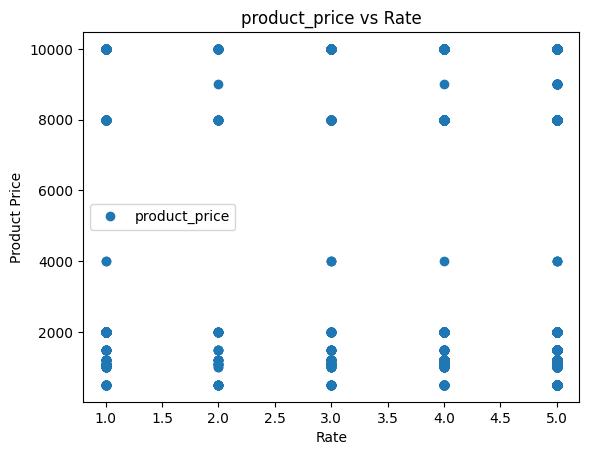

In [3]:
dataset['Rate'] = pd.to_numeric(dataset['Rate'], errors='coerce')
dataset['product_price'] = pd.to_numeric(dataset['product_price'], errors='coerce')
dataset.plot(x='Rate', y='product_price', style='o')
plt.xlabel('Rate')
plt.ylabel('Product Price')
plt.title('product_price vs Rate')
plt.show()

<BarContainer object of 5 artists>

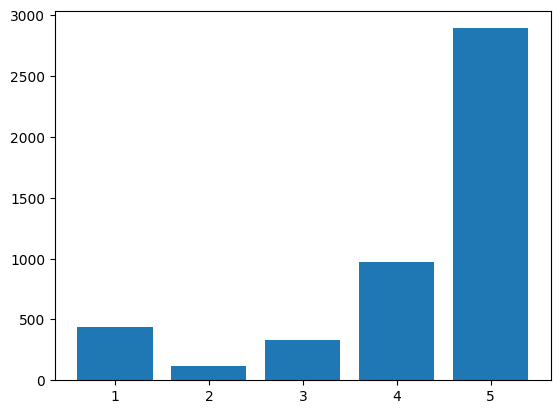

In [4]:
x=[5,4,1,3,2]
plt.bar(x,dataset['Rate'].value_counts())

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
text_data_x = dataset.iloc[:, 2:5]
text_data_y = dataset.iloc[:, -1]

text_x = text_data_x.apply(lambda row: ' '.join(row.values.astype(str)), axis=1).tolist()
# Handle missing values in text_y by filling them with an empty string
text_y = text_data_y.fillna('').tolist()

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(text_x)
y = vectorizer.transform(text_y)
vectorizer_array = x.toarray()
print(vectorizer_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the non-numerical columns
dataset['Review'] = label_encoder.fit_transform(dataset['Review'])
dataset['Summary'] = label_encoder.fit_transform(dataset['Summary'])


imputer = SimpleImputer(strategy='mean') # You can choose a differeif needed
dataset[['Rate', 'Review', 'Summary']] = imputer.fit_transform(dataset[['Rate', 'Review', 'Summary']])


kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset[['Rate', 'Review','Summary']])


KMeans(n_clusters=3)

In [8]:
print(kmeans.cluster_centers_)

[[   4.12610169   61.77694915 1904.45491525]
 [   4.33626857   63.74408365  706.97083104]
 [   4.14951989   62.77434842 3030.42729767]]


[1 1 2 ... 2 2 2]


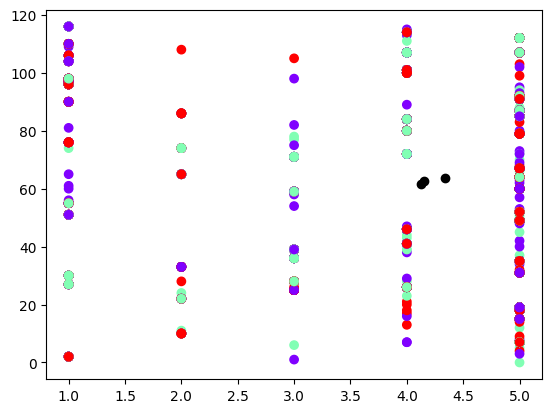

In [9]:
print(kmeans.labels_)
plt.scatter(dataset['Rate'], dataset['Review'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.show()

In [11]:
# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(dataset[['Rate', 'Review', 'Summary']], kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate clustering performance using Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(dataset[['Rate', 'Review', 'Summary']], kmeans.labels_)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")

Silhouette Score: 0.601518813959159
Davies-Bouldin Score: 0.4907860391120946


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the features for clustering
features = dataset[['Rate', 'Review', 'Summary']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Apply KMeans to the scaled features
kmeans_scaled = KMeans(n_clusters=3, random_state=42) # Using random_state for reproducibility
kmeans_scaled.fit(scaled_features)

# Evaluate clustering performance using Davies-Bouldin score on scaled features
davies_bouldin_scaled = davies_bouldin_score(scaled_features, kmeans_scaled.labels_)
print(f"Davies-Bouldin Score after scaling: {davies_bouldin_scaled}")

Davies-Bouldin Score after scaling: 1.2854117366533369


In [15]:
dataset['cluster'] = kmeans.labels_
px.scatter_3d(dataset, x='Rate', y='Review', z='Summary', color='cluster')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer

# ---------------- Load Dataset ----------------
dataset = pd.read_csv("Dataset-SA.csv")

# ---------------- Missing Values ----------------
print("Missing values before imputation and encoding:")
print(dataset.isnull().sum())



Missing values before imputation and encoding:
product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [4]:
# Convert numeric columns safely
dataset['Rate'] = pd.to_numeric(dataset['Rate'], errors='coerce')
dataset['product_price'] = pd.to_numeric(dataset['product_price'], errors='coerce')

# Handle missing values in 'Sentiment'
dataset['Sentiment'] = dataset['Sentiment'].fillna('')

# ---------------- Text Vectorization ----------------
text_data_x = dataset.iloc[:, 2:5]
text_data_y = dataset.iloc[:, -1]

text_x = text_data_x.apply(lambda row: ' '.join(row.values.astype(str)), axis=1).tolist()
text_y = text_data_y.tolist()

# Fit vectorizers separately
vectorizer_x = CountVectorizer()
x_vectorized = vectorizer_x.fit_transform(text_x)

vectorizer_y = CountVectorizer()
y_vectorized = vectorizer_y.fit_transform(text_y)

# ---------------- Label Encoding ----------------
review_encoder = LabelEncoder()
summary_encoder = LabelEncoder()

dataset['Review_encoded'] = review_encoder.fit_transform(dataset['Review'].astype(str))
dataset['Summary_encoded'] = summary_encoder.fit_transform(dataset['Summary'].astype(str))

In [6]:
from sklearn.utils import resample

# Take a sample of 5000 rows for evaluation
sampled_features, sampled_labels = resample(
    features_original, kmeans_original.labels_,
    n_samples=5000, random_state=42
)

silhouette_original = silhouette_score(sampled_features, sampled_labels)
davies_bouldin_original = davies_bouldin_score(sampled_features, sampled_labels)
ch_original = calinski_harabasz_score(sampled_features, sampled_labels)


print("\nOriginal Clustering (Rate, Encoded Review, Encoded Summary):")
print(f"Silhouette Score: {silhouette_original:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_original:.4f}")
print(f"Calinski-Harabasz Score: {ch_original:.4f}")




Original Clustering (Rate, Encoded Review, Encoded Summary):
Silhouette Score: 0.6539
Davies-Bouldin Score: 0.4285
Calinski-Harabasz Score: 24720.3819


In [8]:
from sklearn.utils import resample

# Sample 5000 rows for evaluation (adjust if dataset is smaller)
sampled_scaled_features, sampled_scaled_labels = resample(
    scaled_features, kmeans_scaled.labels_,
    n_samples=5000, random_state=42
)

silhouette_scaled = silhouette_score(sampled_scaled_features, sampled_scaled_labels)
davies_bouldin_scaled = davies_bouldin_score(sampled_scaled_features, sampled_scaled_labels)
ch_scaled = calinski_harabasz_score(sampled_scaled_features, sampled_scaled_labels)

print("\nScaled Clustering (Rate, Encoded Review, Encoded Summary):")
print(f"Silhouette Score: {silhouette_scaled:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_scaled:.4f}")
print(f"Calinski-Harabasz Score: {ch_scaled:.4f}")



Scaled Clustering (Rate, Encoded Review, Encoded Summary):
Silhouette Score: 0.3347
Davies-Bouldin Score: 1.1528
Calinski-Harabasz Score: 2327.4085


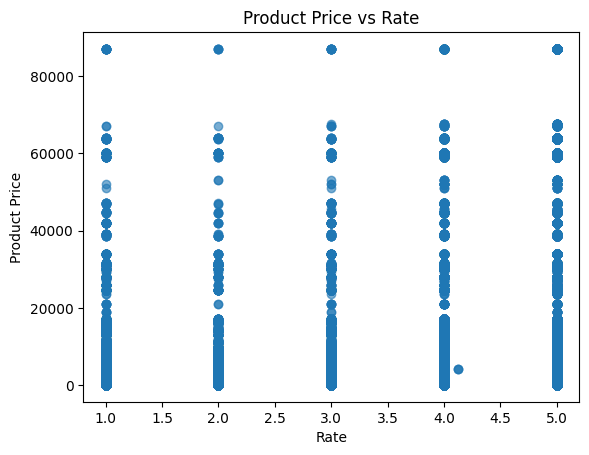

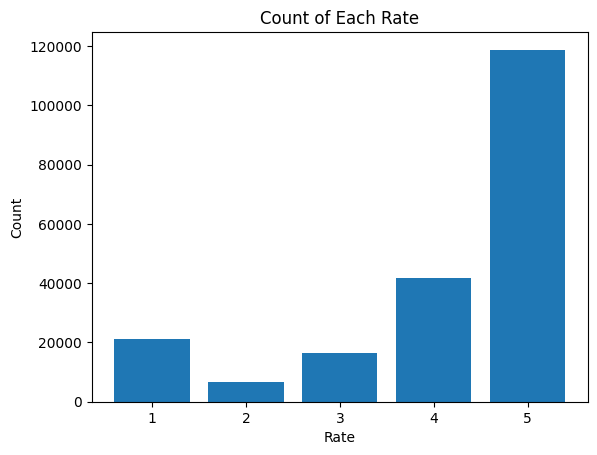

In [9]:
# ---------------- Visualizations ----------------
# Scatter plot: product_price vs Rate
plt.figure()
plt.scatter(dataset['Rate'], dataset['product_price'], alpha=0.6)
plt.xlabel("Rate")
plt.ylabel("Product Price")
plt.title("Product Price vs Rate")
plt.show()

# Bar plot: Rate counts
rate_counts = dataset['Rate'].value_counts().sort_index()
plt.figure()
plt.bar(rate_counts.index, rate_counts.values)
plt.xlabel("Rate")
plt.ylabel("Count")
plt.title("Count of Each Rate")
plt.show()

# 3D Scatter (Original)
fig_original = px.scatter_3d(
    dataset, x="Rate", y="Review_encoded", z="Summary_encoded",
    color="cluster_original", title="3D Scatter Plot of Clusters (Original Features)"
)
fig_original.show()

# 3D Scatter (Scaled)
fig_scaled = px.scatter_3d(
    dataset, x="Rate", y="Review_encoded", z="Summary_encoded",
    color="cluster_scaled", title="3D Scatter Plot of Clusters (Scaled Features)"
)
fig_scaled.show()


TF-IDF + Rate Clustering Results:
Silhouette Score: 0.2068
Davies-Bouldin Score: 1.6984
Calinski-Harabasz Score: 2377.4143


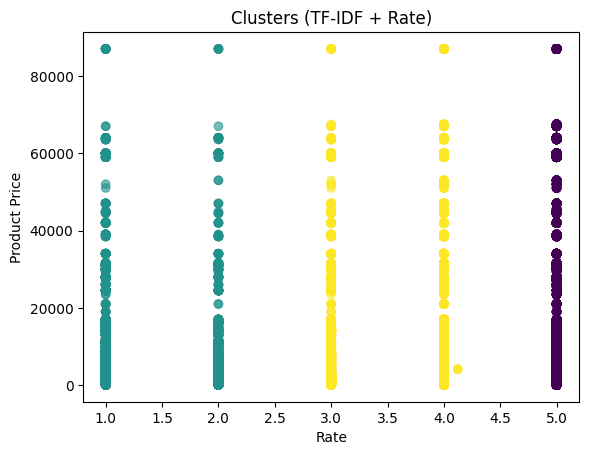

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
from scipy.sparse import hstack

# ---------------- Load Dataset ----------------
dataset = pd.read_csv("Dataset-SA.csv")

# ---------------- Handle Missing Values ----------------
dataset['Rate'] = pd.to_numeric(dataset['Rate'], errors='coerce')
dataset['product_price'] = pd.to_numeric(dataset['product_price'], errors='coerce')

imputer = SimpleImputer(strategy='mean')
dataset[['Rate', 'product_price']] = imputer.fit_transform(dataset[['Rate', 'product_price']])

dataset['Review'] = dataset['Review'].fillna("")
dataset['Summary'] = dataset['Summary'].fillna("")

# ---------------- TF-IDF Vectorization ----------------
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")  # limit features for speed
tfidf_review = tfidf.fit_transform(dataset['Review'])
tfidf_summary = tfidf.fit_transform(dataset['Summary'])

# ---------------- Combine Features ----------------
# Stack sparse TF-IDF with dense numeric (Rate)
rate_array = dataset[['Rate']].values  # numeric column
features_combined = hstack([rate_array, tfidf_review, tfidf_summary])  # sparse matrix

# ---------------- Clustering ----------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(features_combined)
dataset['cluster_tfidf'] = kmeans.labels_

# ---------------- Evaluation (sample for speed) ----------------
sample_features, sample_labels = resample(
    features_combined, kmeans.labels_, n_samples=5000, random_state=42
)

silhouette = silhouette_score(sample_features, sample_labels)
davies_bouldin = davies_bouldin_score(sample_features.toarray()[:5000], sample_labels[:5000])  # DB needs dense
ch = calinski_harabasz_score(sample_features.toarray()[:5000], sample_labels[:5000])

print("\nTF-IDF + Rate Clustering Results:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {ch:.4f}")

# ---------------- Visualization ----------------
# Simple 2D scatter (Rate vs Product Price, color = cluster)
plt.figure()
plt.scatter(dataset['Rate'], dataset['product_price'], c=dataset['cluster_tfidf'], cmap="viridis", alpha=0.6)
plt.xlabel("Rate")
plt.ylabel("Product Price")
plt.title("Clusters (TF-IDF + Rate)")
plt.show()
